In [1]:
from zipfile import ZipFile
import pandas as pd
import numpy as np
import subprocess
import os

In [2]:
def fetchdata():
    cli_command = "kaggle competitions download -c cat-in-the-dat -w"
    subprocess.run(cli_command, shell=True) # Get data from kaggle
    zip_files = [files for files in os.listdir() if files.endswith('.zip')]
    # Unzip files if not already unzipped
    unzipped_filenames = [files.replace('.zip','') for files in zip_files]
    if not all(x in os.listdir() for x in unzipped_filenames):
        for file in zip_files:
            with ZipFile(file, 'r') as zip:
                zip.extractall()

In [3]:
fetchdata()
data = pd.read_csv('train.csv')

In [4]:
print(data.head())
print(data.info())
print(data.describe())

   id  bin_0  bin_1  bin_2 bin_3 bin_4  nom_0      nom_1    nom_2    nom_3  \
0   0      0      0      0     T     Y  Green   Triangle    Snake  Finland   
1   1      0      1      0     T     Y  Green  Trapezoid  Hamster   Russia   
2   2      0      0      0     F     Y   Blue  Trapezoid     Lion   Russia   
3   3      0      1      0     F     Y    Red  Trapezoid    Snake   Canada   
4   4      0      0      0     F     N    Red  Trapezoid     Lion   Canada   

   ...      nom_9 ord_0        ord_1        ord_2 ord_3 ord_4  ord_5 day  \
0  ...  2f4cb3d51     2  Grandmaster         Cold     h     D     kr   2   
1  ...  f83c56c21     1  Grandmaster          Hot     a     A     bF   7   
2  ...  ae6800dd0     1       Expert     Lava Hot     h     R     Jc   7   
3  ...  8270f0d71     1  Grandmaster  Boiling Hot     i     D     kW   2   
4  ...  b164b72a7     1  Grandmaster     Freezing     a     R     qP   7   

  month target  
0     2      0  
1     8      0  
2     2      0  
3     

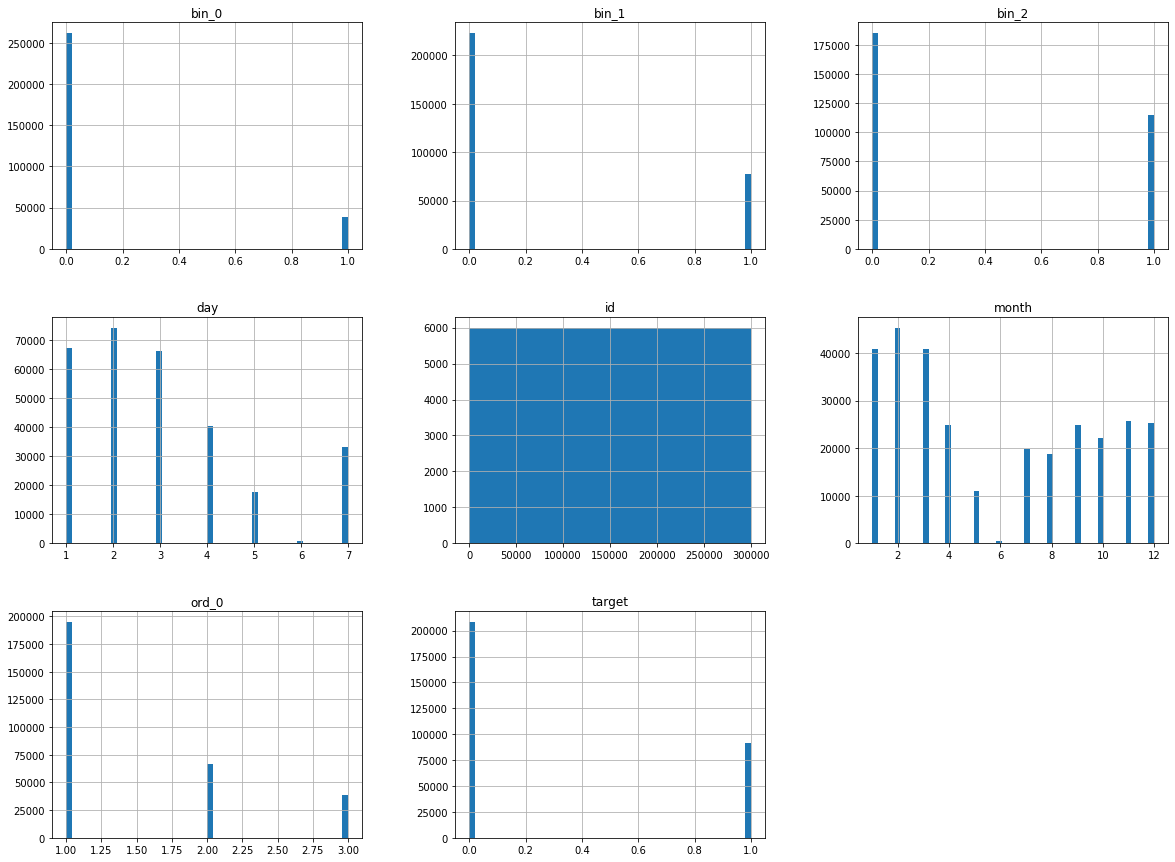

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20,15))
plt.show()

In [6]:
categorical_data = data.drop('target', axis=1)

In [7]:
categorical_data_labels = data['target'].copy()

In [8]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
data_prepared = cat_encoder.fit_transform(data)

In [9]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
tree_reg = DecisionTreeRegressor()
tree_reg.fit(data_prepared, categorical_data_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [10]:
data_predictions = tree_reg.predict(data_prepared)
tree_mse = mean_squared_error(categorical_data_labels, data_predictions)
tree_rmse = np.sqrt(tree_mse)
print(tree_mse)

0.0


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, data_prepared, categorical_data_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [ ]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

In [32]:
test_data = pd.read_csv('test.csv')
x_test = test_data.drop('target', axis=1)
x_test_prepared = cat_encoder.fit_transform(x_test)
y_test = test_data['target'].copy()

In [ ]:
final_predictions = tree_reg.predict(x_test_prepared)
predictions = pd.series(final_predictions)
pd.write to 